### Predicción de precios de casas

In [14]:
#Importando librerias a utilizar
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

Usando sclicing con NumPy separar los datos en 2 datasets:
entrenamiento(80%)
validación y pruebas(20%) 

In [15]:
#Cargando data del set de datos
data = np.load('./proyecto_training_data.npy') #Extraer data 

sliceSize = int(len(data) * .8) #Calculo para saber cual es el 80% de los datos 
TrainingData = data[:sliceSize] #80% del total de datos para training data
TestData = data[sliceSize:] #20% del total de los datos para test data


pandas_df = pd.DataFrame(TrainingData,columns=['PrecioVenta','Calidad','PiesCuadrados','Habitaciones','AñoConstruccion','PiesCalle'])
pandas_df

,PrecioVenta,Calidad,PiesCuadrados,Habitaciones,AñoConstruccion,PiesCalle
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0
...,...,...,...,...,...,...
1163,108959.0,4.0,1258.0,6.0,1969.0,60.0
1164,194000.0,5.0,1432.0,5.0,1978.0,NaN
1165,233170.0,7.0,1502.0,7.0,2009.0,79.0
1166,245350.0,8.0,1694.0,7.0,2008.0,64.0


## Análisis exploratorio de datos.

### Para cada variable en el dataset calcular:


1.   Media
2.   Valor Máximo
3.   Valor Mínimo
4.   Rango(peak to peak, no el rango del tensor que por ser verctor sabemos que es 1)
5.   Desviación estándar

In [16]:
resumen = pandas_df.describe()

max_df=pd.DataFrame([resumen.iloc[7]])
min_df=pd.DataFrame([resumen.iloc[3]])
rango = max_df.values - min_df.values #valor maximo - valor minimo de cada variable
rango_df = pd.DataFrame(rango,columns=['PrecioVenta','Calidad','PiesCuadrados','Habitaciones','AñoConstruccion','PiesCalle'])
res = (resumen.iloc[[1,7,3]].append(rango_df)).append(resumen.iloc[2])

res

,PrecioVenta,Calidad,PiesCuadrados,Habitaciones,AñoConstruccion,PiesCalle
mean,180590.277397,6.101027,1156.323630,6.485445,1971.451199,69.946985
max,755000.000000,10.000000,3228.000000,14.000000,2010.000000,313.000000
min,34900.000000,1.000000,334.000000,2.000000,1875.000000,21.000000
0,720100.000000,9.000000,2894.000000,12.000000,135.000000,292.000000
std,78815.697902,1.378025,373.780374,1.609141,29.951707,23.478161


### Para cada variable en el dataset usar seaborn para graficar  un histograma de la variable.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


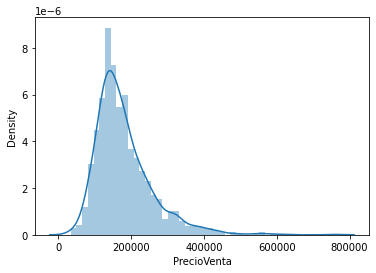

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


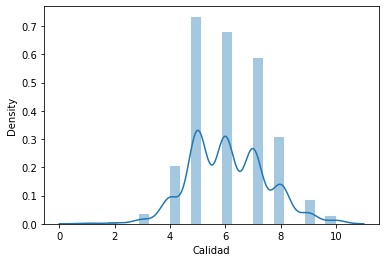

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


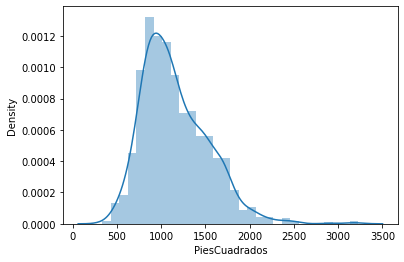

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


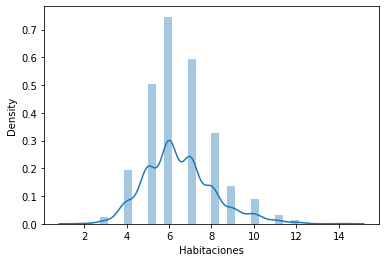

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


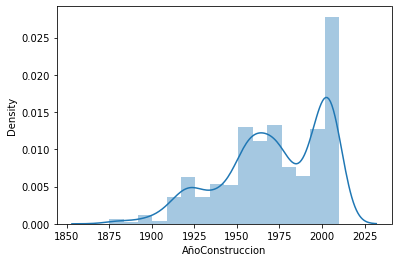

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


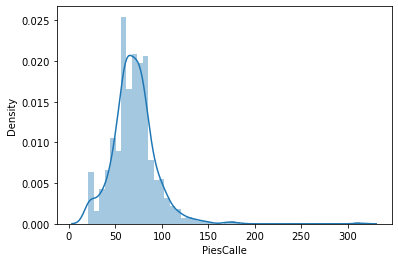

In [17]:
Vars= pandas_df.T

def histograma(col):
  fig  = plt.figure()
  ax = fig.add_subplot(1,1,1)
  sns.distplot(Vars.loc[col],kde = True)
  plt.show()

histograma('PrecioVenta')
histograma('Calidad')
histograma('PiesCuadrados')
histograma('Habitaciones')
histograma('AñoConstruccion')
histograma('PiesCalle')



### Para cada variable independiente x :

1.   Calcular el coeficiente de correlación entre x y y
2.   graficar x vs y
3.   Colocar el coeficiente de correlación como parte del título de la gráfica. 

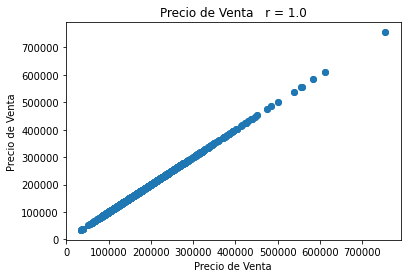

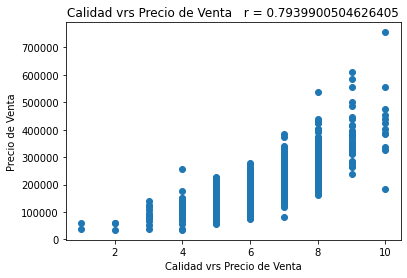

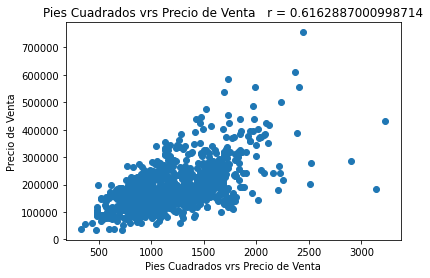

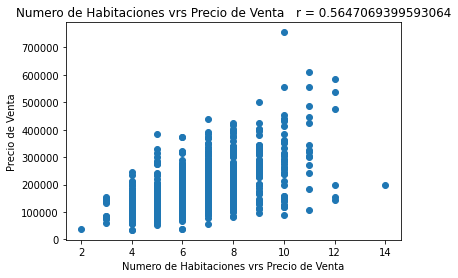

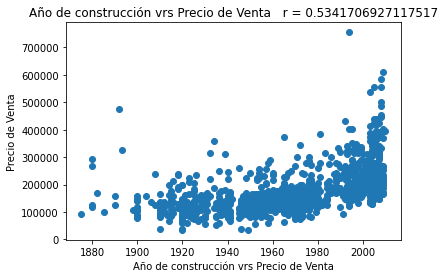

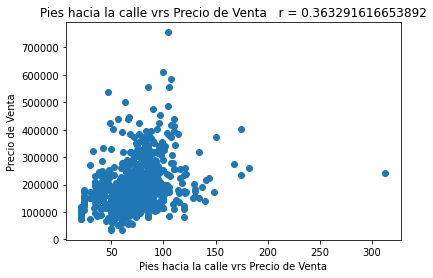

In [18]:
def graficaCorrelacion(variable, titulo):
  temp =(pandas_df[['PrecioVenta', variable]]).dropna() #quitar Nan en las dos variables a analizar para que coincida el numero de datos
  y=(temp.T).loc['PrecioVenta']
  x=(temp.T).loc[variable]

  correlacion = np.corrcoef(x, y)[1, 0]
  fig = plt.figure()
  ax = fig.add_subplot(1, 1, 1,)
  ax.scatter(x, y)
  ax.set_title(titulo +'   r = '+ str(correlacion))
  plt.xlabel(titulo) 
  plt.ylabel('Precio de Venta') 
  plt.show()

graficaCorrelacion('PrecioVenta', "Precio de Venta")
graficaCorrelacion('Calidad', "Calidad vrs Precio de Venta")
graficaCorrelacion('PiesCuadrados', "Pies Cuadrados vrs Precio de Venta")
graficaCorrelacion('Habitaciones', "Numero de Habitaciones vrs Precio de Venta")
graficaCorrelacion('AñoConstruccion', "Año de construcción vrs Precio de Venta")
graficaCorrelacion('PiesCalle', "Pies hacia la calle vrs Precio de Venta")

### Basado en la gráfica y el coeficiente de correlación  de cada par x,y elegir  las 2 variables con más potencial predictivo.

#### Se elige las variables calidad y pies cuadrados
*   Variable Calidad correlación r = 0.7939
*   Variable Pies Cuadrados correlación r = 0.6162 




## Crear una función para entrenar un modelo de regresión lineal de una variable 
y = mx +b.

La función recibe como argumentos:


*   vector con  la variable independiente “x” ,  
*   vector con la variable dependiente “y”,  
*   un entero “epochs” que indica por cuantas iteraciones entrenar el modelo.
*   un entero  “imprimir_error_cada”  , que nos indica cada cuantas iteraciones queremos imprimir a través de print : el número de iteración, el error del modelo en esa iteración, si imprimir_error_cada = 10, se despliega en pantalla el error en las iteraciones: 10,20,30,40,50
*   escalar lr(learning rate): es usado como parte de la expresión matemática para actualizar en cada iteración los parámetros del modelo.





In [19]:

temp =(pandas_df[['PrecioVenta','Calidad', 'PiesCuadrados']]).dropna() #quitar Nan en las dos variables a analizar para que coincida el numero de datos
x=temp[['Calidad']]
y=temp[['PrecioVenta']]

def calcularError(y_hat,y):
  return np.mean(np.square(y_hat.values - y.values))/2
  

def funcion_mx_b(x,y,n_epochs,imprimir_error_cada,lr):
  v_error=[]
  x_ones = x.assign(Ones=1)
  parametros = pd.DataFrame([[0,0]],columns=["m","b"])
  modelo = {}
  
  for epoch in range(0, n_epochs+1):
    y_hat = pd.DataFrame(np.matmul(x_ones.values,parametros.T.values),columns=['y_hat'])

    resta_ys= y_hat.values - y.values
    error_iteracion = calcularError(y_hat, y)

    gradiente = np.mean(resta_ys*x_ones.values, axis=0)
    
    modelo[epoch] = {'mb': parametros, 'x': x, 'y': y, 'y_hat': y_hat}
    
    parametros = parametros-lr*gradiente 

    v_error.append(error_iteracion)

    if (epoch % imprimir_error_cada == 0 and epoch>0):
      print("Error iteración ",epoch,": ",v_error[epoch])

  return modelo, v_error


### Función del error en el tiempo

Crear una función que nos permita visualizar con matplotlib cómo cambia el error en el tiempo: crear una función que tome como parámetro el vector de errores generados por la función de entrenamiento y grafique en el eje “x” el número de iteración y en el eje “y”  el error para esa iteración:

In [20]:

def visualizar_error(errores):
  fig = plt.figure()
  ax = fig.add_subplot(1,1,1)
  ax.plot(np.array(range(len(errores))), errores)
  ax.set_title('Error en iteraciones')
  plt.xlabel('Iteracion') 
  plt.ylabel('Error') 
  plt.show()


### Función para visualizar evolución del modelo en el tiempo

Crear una función que nos permita visualizar con matplotlib cómo evoluciona el modelo entrenado en el tiempo : Crear una función que tome como parámetro la estructura de datos conteniendo el historial de modelos ,y un valor “n” que indica cada cuantas iteraciones graficar el modelo resultante,  por ejemplo para n=3 la función debe graficar la recta correspondiente al modelo junto a los datos cada 3 iteraciones, si se ejecutaron 15 iteraciones , para n = 3 se grafica el modelo de las iteraciones 3,6,9,12,15 junto con los datos de entrenamiento.


In [21]:

def visualizar_modelos(listaModelos, n):
  print("\nEVOLUCIÓN DEL MODELO EN EL TIEMPO")
  
  for i in range(n, len(listaModelos),n):
    fig = plt.figure()
    modelo = listaModelos[i]
    ax = fig.add_subplot(1,1,1)
    ax.scatter(modelo['x'], modelo['y'], color='black')
    ax.plot(modelo['x'], modelo['y_hat'])
    ax.set_title('Iteracion número '+str(i))
    plt.show()


### Entrenamiento de modelos de regresión lineal y=mx+b

Utilizar las funciones del punto anterior para entrenar modelos de regresión lineal y=mx +  b , para cada una de las variables “x” elegidas, basándose en las  funciones para graficar las curvas de aprendizaje  y comparación del modelo vs los datos elegir el número de “epochs” o iteraciones a entrenar el modelo(y experimentar con el learning _rate)

Criterio: El error debe disminuir lo más posible por lo cual la curva de aprendizaje debe disminuir hasta que ya no disminuya mucho (se estabilice o converja ) , si el error baja y comienza a subir debemos usar menos iteraciones.



MODELO CON VARIABLE CALIDAD

Error iteración  150 :  1277623435.4257014
Error iteración  300 :  1215846019.799956
Error iteración  450 :  1183267061.6055892
Error iteración  600 :  1166086211.51208


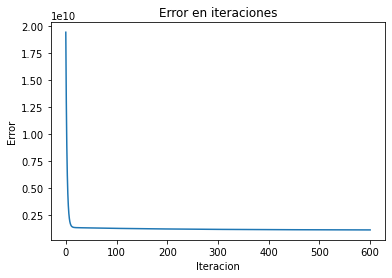


EVOLUCIÓN DEL MODELO EN EL TIEMPO


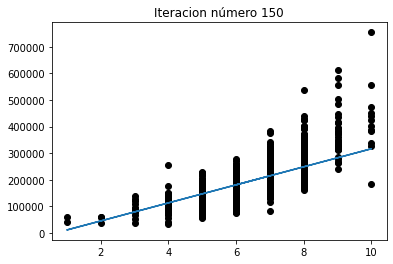

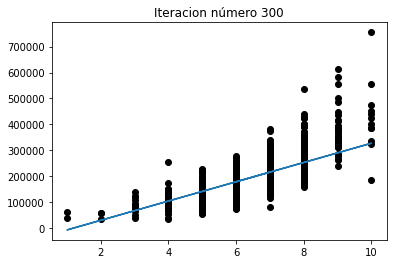

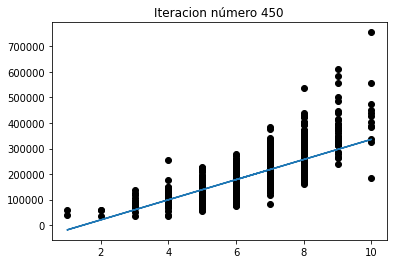

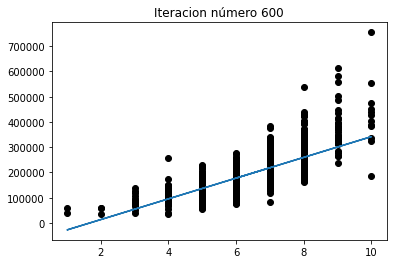

In [22]:
temp =(pandas_df[['PrecioVenta','Calidad', 'PiesCuadrados']]).dropna() #quitar Nan en las dos variables a analizar para que coincida el numero de datos
x=temp[['Calidad']]
y=temp[['PrecioVenta']]

print("\nMODELO CON VARIABLE CALIDAD\n")
modeloManualCalidad, erroresManualCalidad = funcion_mx_b(x,y,600,150,0.045)
visualizar_error(erroresManualCalidad)
visualizar_modelos(modeloManualCalidad,150)



MODELO CON VARIABLE PIES CUADRADOS

Error iteración  10 :  1969505799.4458885
Error iteración  20 :  1968093020.2640598
Error iteración  30 :  1968092815.4421997
Error iteración  40 :  1968092725.0415845


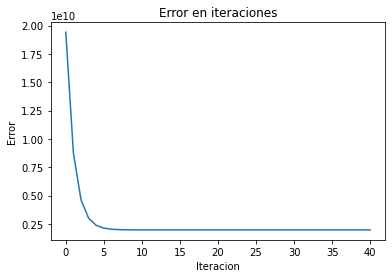


EVOLUCIÓN DEL MODELO EN EL TIEMPO


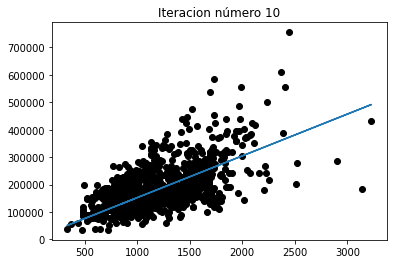

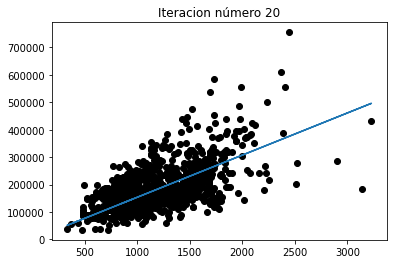

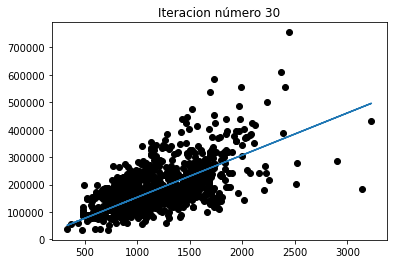

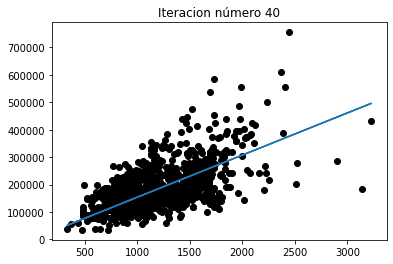

In [23]:
#temp =(pandas_df[['PrecioVenta','Calidad', 'PiesCuadrados']]).dropna() #quitar Nan en las dos variables a analizar para que coincida el numero de datos
x=temp[['PiesCuadrados']]
y=temp[['PrecioVenta']]

print("\nMODELO CON VARIABLE PIES CUADRADOS\n")
modeloManualPiesCuadrados, erroresManualPiesCuadrados = funcion_mx_b(x,y,40,10,0.0000011)
visualizar_error(erroresManualPiesCuadrados)
visualizar_modelos(modeloManualPiesCuadrados,10)


### SCIKIT-LEAR

Para cada una de las variables x seleccionadas, usar scikit-learn para entrenar un modelo de regresión lineal: 

In [26]:

x=temp[['Calidad']]
y=temp[['PrecioVenta']]

modeloSKLCalidad = LinearRegression().fit(x, y)

x=temp[['PiesCuadrados']]
modeloSKLPiesCuadrados = LinearRegression().fit(x, y)



Para cada variable independiente x elegida, crear una función que usando el modelo entrenado manualmente y el modelo de scikit-learn(enviados como parámetros a la funcion) calcule la estimación o predicción de cada uno de estos y devuelva como resultado una predicción estimada promediando las predicciones de los 2  modelos:

In [27]:
def prediccion(modeloManual, modeloSKL,x):
  x_ones = x.assign(Ones=1)

  predManual = np.matmul(x_ones.values, modeloManual[len(modeloManual)-1]['mb'].T.values)
  predSKL = modeloSKL.predict(x)
  predPromedio = np.mean(np.array([predManual, predSKL]), axis=0)

  return predManual,predSKL, predPromedio


Usando el 20% de los datos de validación, aplicamos los modelos predictivos para estimar la variable dependiente  y usando los valores reales de “y” calculamos el error de cada modelo.


In [28]:
pandas_dfTest = pd.DataFrame(TestData,columns=['PrecioVenta','Calidad','PiesCuadrados','Habitaciones','AñoConstruccion','PiesCalle'])
tempTest =(pandas_dfTest[['PrecioVenta','Calidad', 'PiesCuadrados']]).dropna()
x_test = tempTest[['Calidad']]
y_test = tempTest[['PrecioVenta']]

#Estimación variable dependiente
y_predManCalidad, y_predSKLCalidad, y_predPromedioCalidad = prediccion(modeloManualCalidad, modeloSKLCalidad,tempTest[['Calidad']])
y_predManPiesC, y_predSKLPiesC, y_predPromedioPiesC = prediccion(modeloManualPiesCuadrados, modeloSKLPiesCuadrados,tempTest[['PiesCuadrados']])

#Calculo de errores variable Calidad
errorPredManCalidad = calcularError(pd.DataFrame(y_predManCalidad,columns=['y_hat']), y_test)
errorPredSKLCalidad = calcularError(pd.DataFrame(y_predSKLCalidad,columns=['y_hat']), y_test)
errorPredPromedioCalidad = calcularError(pd.DataFrame(y_predPromedioCalidad,columns=['y_hat']), y_test)

#Calculo de errores variable Pies Cuadrados
errorPredManPiesC = calcularError(pd.DataFrame(y_predManPiesC,columns=['y_hat']), y_test)
errorPredSKLPiesC = calcularError(pd.DataFrame(y_predSKLPiesC,columns=['y_hat']), y_test)
errorPredPromedioPiesC = calcularError(pd.DataFrame(y_predPromedioPiesC,columns=['y_hat']), y_test)



Para cada variable independiente “x” elegida : 
Graficar el  error de cada modelo para esta variable “x”
Concluir cuál modelo para la  variable “x” es el mejor a ser usado (error mas bajo)


Se concluye que el mejor modelo a utilizar es el modelo SCIKIT Learn para ambas varialbes, Calidad y Pies cuadrados, es el modelo que tiene menor error.
Y entre la variable Calidad y Pies Cuadrados la mejor estimación es la de Calidad que tienen menor error en ambos modelos.

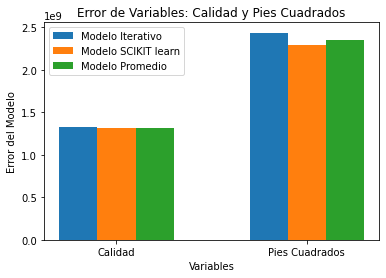

In [30]:
indice = np.arange(2)
ancho = 0.20

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.bar(indice,(errorPredManCalidad, errorPredManPiesC),width=ancho,label='Modelo Iterativo')
ax.bar(indice+ancho,(errorPredSKLCalidad, errorPredSKLPiesC),width=ancho,label='Modelo SCIKIT learn')
ax.bar(indice+(ancho*2),(errorPredPromedioCalidad, errorPredPromedioPiesC),width=ancho,label='Modelo Promedio')
plt.title('Error de Variables: Calidad y Pies Cuadrados')
plt.ylabel('Error del Modelo')
plt.xlabel('Variables')
plt.xticks(indice + ancho, ('Calidad', 'Pies Cuadrados'))
plt.legend(loc='best')
plt.show()

